Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">Markus</p>| <p style="text-align: left">Frohmann</p> | k12005604 |
| <p style="text-align: left">Tobias</p>| <p style="text-align: left">Morocutti</p> | k12008172 |


<h2 style="text-align: center">344.063: Special Topics - Natural Language Processing with Deep Learning (SS2023)</h2><h1 style="text-align: center;color:rgb(0,120,170)">Assignment 1: Document Classification with LSTM and Transformers</h1>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-classification-framework"><li style="font-size:large;font-weight:bold">Task A: PyTorch Framework for Document Classification (5 points)</li></a>
    <a href="#section-classification-rnn"><li style="font-size:large;font-weight:bold">Task B: Document Classification with LSTM (15 points)</li></a>
    <a href="#section-classification-attention"><li style="font-size:large;font-weight:bold">Task C: Document Classification with Attention (15 points)</li></a>
    <a href="#section-classification-transformer"><li style="font-size:large;font-weight:bold">Task D: Document Classification with Transformer (15 points)</li></a>
    <a href="#section-interpretation"><li style="font-size:large;font-weight:bold">Task E: Interpreting Attention Weights (3 extra points)</li></a>
    
</ol>

# TODOs
- wandb integration
- double-check Task A: is it the most recent version, and is it correct?

Task B:
- Run grid search for all variations

Task C:
- Run grid search for all variations
- implement different attention mechanisms

Task D:
- everything

Task E:
- everything

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective
The aim of this assignment is to implement a document/sentence classification model with PyTorch, particularly by using Long Short-Term Memory (LSTM), Attention networks, and Transformers. The assignment has **50 points** in total.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contains code, reports, charts, tables, or any other material, required for the assignment. Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments. Try to provide the solutions in a clear, and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the author(s) know shall you find any error or unclarity in the assignment.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python`, `PyTorch` and, `transformers`. Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f18654892601870996f2494cf3/48245/7814719893537218646/nlpwdl2023_data.zip).

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.label.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>

<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<div style="background-color:rgb(224, 243, 255)">

### Publishing Experiments Results

In all experiments of this assignment, use any experiment monitoring tool like [`TensorBoard`](https://www.tensorflow.org/tensorboard), [`wandb`](https://wandb.ai) to log and store all useful information about the training and evaluation of the models. Feel free to log any important aspect in particular the changes in evaluation results on validation, in training loss, and in learning rate.

After finalizing all experiments and cleaning any unnecessary experiment, **provide the URL to the results monitoring page in the cell below**.

For instance if using [`TensorBoard.dev`](https://tensorboard.dev), you can run the following command in the folder of log files: `tensorboard dev upload --name my_exp --logdir path/to/output_dir`, and take the provided URL to the TensorBoard's console.

</div>


**URL :** *EDIT!*

<a name="section-classification-framework"></a><h2 style="color:rgb(0,120,170)">Task A: PyTorch Framework for Document Classification (5 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The formulation of this task is identical to the Assignment 3 of UE Natural Language Processing course. In this task, you implement a document classification model, which given a document/sentence, predicts the corresponding class. The PyTorch model in this task should be called **`ClassificationAverageModel`** in your code.

Given a document, first each word is mapped to its corresponding vector. Then, the word vectors are composed to create the embedding of the document using the *element-wise mean* of the word vectors. Formally, given the document $d$, consisting of words $\left[ v_1, v_2, ..., v_{|d|} \right]$, the document representation $\mathbf{e}_d$ is defined as:

<center><div>$\mathbf{e}_d = \frac{1}{|d|}\sum_{i=1}^{|d|}{\mathbf{e}_{v_i}}$</div></center>

where $\mathbf{e}_{v}$ is the vector of the word $v$, and $|d|$ is the length of the document. This document embedding is finally used as features to predict the class (label) of the document. The implementation of the classification model should cover the following points.


    
**Preprocessing, Dictionary, and Word Embedding Lookup (1 point):** Load the train, validation, and test sets. Apply necessary preprocessing steps based on your judgement. Tokenize the preprocessed text. Use the processed tokens of the training set to create a dictionary of vocabularies. Reduce the size of dictionary using a proper method, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs from the texts, or to replace them with a special token like <OOV>. After then, create a lookup for the embeddings of all the words in the dictionary. The lookup is an embedding matrix, which maps the ID of each word to a corresponding vector. Use the pre-trained vectors of a word embedding model (like [`word2vec`](https://code.google.com/archive/p/word2vec/) or [`GloVe`](https://nlp.stanford.edu/projects/glove/)) to initialize the word embeddings of the lookup. Keep in mind that the embeddings of the words in the lookup should be matched with the correct vector in the pretrained word embedding. If the vector of a word in the lookup does not exist in the pretrained word embeddings, the corresponding vector should be initialized randomly. The word embeddings of the classification model are trainable, meaning that the word vectors get updated end-to-end with the other parameters of the model.

**Data Batching and Forward Pass (1 point):** Create batches for any given dataset (train/validation/test). Each batch is a two-dimensional matrix of *batch-size* to *max-document-length*, consisting of the ids of the words in documents. *Batch-size* and *max-document-length* are two hyper-parameters of the model. Next, given a batch, the model fetches the corresponding embeddings, and use them to calculate the document embeddings according to the formulation above. These document embeddings are then exploited to predict the probability distributions of the output classes using a linear projection, followed by a softmax layer.

**Loss Function, Optimization, Early Stopping, and Evaluation (1.5 point):** Loss between the predicted and the actual classes is calculated using Negative Log Likelihood. Feel free to use any optimization mechanism such as Adam. After each epoch, evaluate the model on the *validation set* using the <ins>accuracy metric</ins>. If the evaluation result improves, save the model as the best performing one so far. If the results are not improving after a certain number of evaluation rounds (set as another hyper-parameter) or if training reaches a certain number of epochs, the training procedure can be terminated. After finishing the training, load the best performing model, and use it to predict the classes of the data points in the test set. To evaluate the models, use the <ins>accuracy metric</ins> throughout the task.

**Overall functionality of the model (1 point)**

**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

</div>

## Load data and Imports

**Preprocessing, Dictionary, and Word Embedding Lookup (1 point):** Load the train, validation, and test sets. Apply necessary preprocessing steps based on your judgement. Tokenize the preprocessed text. Use the processed tokens of the training set to create a dictionary of vocabularies. Reduce the size of dictionary using a proper method, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs from the texts, or to replace them with a special token like <OOV>. After then, create a lookup for the embeddings of all the words in the dictionary. The lookup is an embedding matrix, which maps the ID of each word to a corresponding vector. Use the pre-trained vectors of a word embedding model (like [`word2vec`](https://code.google.com/archive/p/word2vec/) or [`GloVe`](https://nlp.stanford.edu/projects/glove/)) to initialize the word embeddings of the lookup. Keep in mind that the embeddings of the words in the lookup should be matched with the correct vector in the pretrained word embedding. If the vector of a word in the lookup does not exist in the pretrained word embeddings, the corresponding vector should be initialized randomly. The word embeddings of the classification model are trainable, meaning that the word vectors get updated end-to-end with the other parameters of the model.

In [1]:
import pandas as pd
import numpy as np
import gensim

In [2]:
# Load the train, validation, and test sets
BASE_DIR = 'data/nlp2022_23_data/'
TRAIN_FILE = BASE_DIR + 'thedeep.subset' + '.train.txt'
VAL_FILE = BASE_DIR + 'thedeep.subset' + '.validation.txt'
TEST_FILE = BASE_DIR + 'thedeep.subset' + '.test.txt'
LABEL_FILE = BASE_DIR + 'thedeep.' + 'labels.txt'

train_df = pd.read_csv(TRAIN_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
val_df = pd.read_csv(VAL_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
test_df = pd.read_csv(TEST_FILE, sep=',', header=None, names=['sentence_id', 'text', 'label'])
label_df = pd.read_csv(LABEL_FILE, sep=',', header=None, names=['label', 'caption'])

## Pre-process

In [3]:
# print length of each set
print('Train set length: ', len(train_df))
print('Validation set length: ', len(val_df))
print('Test set length: ', len(test_df))

Train set length:  12110
Validation set length:  2596
Test set length:  2595


In [4]:
# print average length of text in each set
print('Average length of text in train set: ', np.round(np.mean(train_df['text'].str.len()), 2))
print('Average length of text in validation set: ', np.round(np.mean(val_df['text'].str.len()), 2))
print('Average length of text in test set: ', np.round(np.mean(test_df['text'].str.len()), 2))

Average length of text in train set:  450.86
Average length of text in validation set:  446.5
Average length of text in test set:  440.51


In [5]:
label_df

,label,caption
0,0,Agriculture
1,1,Cross
2,2,Education
3,3,Food
4,4,Health
5,5,Livelihood
6,6,Logistic
7,7,NFI
8,8,Nutrition
9,9,Protection


Each label corresponds to a given caption, i.e., a category.

In [6]:
def map_label_to_caption(label):
    """
    Map label id to caption using label_df
    :param label: label id, int
    :return: label caption, str
    """
    return label_df[label_df['label'] == label]['caption'].values[0]

In [7]:
train_df = train_df.assign(caption=train_df['label'].apply(map_label_to_caption))
val_df = val_df.assign(caption=val_df['label'].apply(map_label_to_caption))
test_df = test_df.assign(caption=test_df['label'].apply(map_label_to_caption))

### Clean text

In [8]:
import re

# remove punctuation marks, replace dates & numbers, apply case-sensitivity
# do this in order to reduce the size of the dictionary & reduce complexity
def clean_text(text):
    """
    Clean text by removing punctuation marks, replacing dates & numbers, applying case-sensitivity
    :param text: text to clean, str
    :return: cleaned text, str
    """
    # remove punctuation marks
#     text = re.sub(r'[^\w\s]', '', text)
    # replace dates
    text = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}', '< date >', text)
    # replace numbers
    text = re.sub(r'\d+', '< num >', text)
    # apply case-sensitivity
    text = text.lower()
    return text

In [9]:
train_df['cleaned_text'] = train_df['text'].apply(clean_text)
val_df['cleaned_text'] = val_df['text'].apply(clean_text)
test_df['cleaned_text'] = test_df['text'].apply(clean_text)

In [10]:
train_df

,sentence_id,text,label,caption,cleaned_text
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate life-saving inter...
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num >.< num > millio...
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,"while aid imports have held up recently, comme..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...
4,4928,"Based on field reports 9 , the main production...",3,Food,"based on field reports < num > , the main prod..."
...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,? acute watery diarrhoea (awd) continues to be...
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...


### Tokenization

In [11]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
# use NLTK tokenizer (TreebankWordTokenizer)
from nltk.tokenize import word_tokenize
train_df['tokenized_text'] = train_df['cleaned_text'].apply(word_tokenize)
val_df['tokenized_text'] = val_df['cleaned_text'].apply(word_tokenize)
test_df['tokenized_text'] = test_df['cleaned_text'].apply(word_tokenize)

## Stopwords

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# remove stopwords in English in order to reduce the size of the dictionary
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
train_df['tokenized_text'] = train_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
val_df['tokenized_text'] = val_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])
test_df['tokenized_text'] = test_df['tokenized_text'].apply(lambda x: [word for word in x if word not in stop_words])

In [15]:
# create dictionary using train set
def create_dictionary(tokenized_text):
    """
    Create dictionary using train set
    :param tokenized_text: tokenized text, list
    :return: dictionary, dict
    """
    dictionary = {}
    for tokens in tokenized_text:
        for token in tokens:
            if token not in dictionary:
                dictionary[token] = 1
            else:
                dictionary[token] += 1
    return dictionary

In [16]:
dictionary = create_dictionary(train_df['tokenized_text'])

In [17]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  31363


In [18]:
# keep only top-N most frequent words
# removing any word with a lower frequency than a threshold
# OOV (out-of-vocabulary) words will be replaced with the <oov> token
def clean_dictionary(dictionary, N: int, threshold: int):
    """
    Clean dictionary by keeping only top-N most frequent words and removing any word with a lower frequency than a threshold
    :param dictionary: dictionary, dict
    :param N: top-N most frequent words, int
    :param threshold: threshold of word frequency, int
    :return: cleaned dictionary, dict
    """
    # keep only top-N most frequent words
    dictionary = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True)[:N])

    # replace any word with a lower frequency than a threshold
    for key, value in dictionary.copy().items():
        if value < threshold:
            dictionary['<oov>'] = dictionary.get('<oov>', 0) + value
            dictionary.pop(key)
    return dictionary

In [19]:
dictionary = clean_dictionary(dictionary, N=100_000, threshold=5)

In [20]:
# print length of dictionary
print('Length of dictionary: ', len(dictionary))

Length of dictionary:  8247


In [21]:
dictionary

{',': 51067,
 '<': 50593,
 '>': 50580,
 'num': 50536,
 '.': 35521,
 ')': 9820,
 '(': 9808,
 'cases': 4751,
 'food': 4133,
 '%': 4025,
 'people': 3856,
 'reported': 3670,
 '’': 2955,
 'children': 2942,
 'areas': 2541,
 'water': 2511,
 'health': 2477,
 'said': 1921,
 'access': 1828,
 'including': 1794,
 'per': 1699,
 'also': 1691,
 'percent': 1655,
 ':': 1650,
 'due': 1638,
 'affected': 1638,
 'since': 1600,
 'deaths': 1469,
 'number': 1404,
 'households': 1381,
 '“': 1367,
 'total': 1352,
 'country': 1345,
 '”': 1343,
 'humanitarian': 1321,
 'two': 1318,
 'security': 1308,
 'week': 1302,
 'million': 1297,
 'one': 1284,
 'prices': 1268,
 'state': 1247,
 'new': 1246,
 'government': 1237,
 'cent': 1235,
 'refugees': 1227,
 'year': 1219,
 '-': 1148,
 'displaced': 1147,
 'assistance': 1131,
 'according': 1120,
 'cholera': 1115,
 'phase': 1114,
 'need': 1114,
 ';': 1090,
 'south': 1076,
 'suspected': 1075,
 'women': 1074,
 'high': 1068,
 'ipc': 1065,
 'acute': 1060,
 'region': 1055,
 'may': 1

Since we do not longer care about the frequency of each word, we can replace the frequency counts with the word index

In [22]:
# map each word to an index
dictionary = {word: index for index, word in enumerate(dictionary.keys())}

# Data Batching
**Data Batching and Forward Pass (1 point):** Create batches for any given dataset (train/validation/test). Each batch is a two-dimensional matrix of *batch-size* to *max-document-length*, consisting of the ids of the words in documents. *Batch-size* and *max-document-length* are two hyper-parameters of the model. Next, given a batch, the model fetches the corresponding embeddings, and use them to calculate the document embeddings according to the formulation above. These document embeddings are then exploited to predict the probability distributions of the output classes using a linear projection, followed by a softmax layer.

In [23]:
config = {}
config['BATCH_SIZE'] = 32
config['MAX_DOCUMENT_LENGTH'] = 100

In [24]:
def create_x_batches(df, dictionary, batch_size: int, max_document_length: int):
    """
    Create batches for any given dataset (train/validation/test) - X
    :param df: dataframe, pd.DataFrame
    :param dictionary: dictionary, dict
    :param batch_size: batch size, int
    :param max_document_length: max document length, int
    :return: batches of inputs, list of np.ndarray of shape (batch_size, max_document_length)
    """
    n_batches = len(df) // batch_size + 1
    print("Number of batches: ", n_batches)
    batches = []
    for batch_idx in range(n_batches):
        if batch_idx != n_batches - 1:
            # standard batch
            batch = np.zeros((batch_size, max_document_length), dtype=np.int32)
        else:
            # last batch - may be smaller than batch_size
            batch = np.zeros((len(df) - batch_idx * batch_size, max_document_length), dtype=np.int32)
        current_batch_size = batch.shape[0]
        for doc_idx in range(current_batch_size):
            doc = df.iloc[batch_idx * batch_size + doc_idx]['tokenized_text']
            for word_idx in range(min(len(doc), max_document_length)):
                word = doc[word_idx]
                batch[doc_idx, word_idx] = dictionary.get(word, dictionary['<oov>'])
        batches.append(batch)


    return batches

In [25]:
def create_y_batches(df, batch_size: int):
    """
    Create batches for any given dataset (train/validation/test) - y
    :param df: dataframe, pd.DataFrame
    :param batch_size: batch size, int
    :return: batches of labels, np.ndarray of shape (n_batches, batch_size)
    """
    n_batches = len(df) // batch_size + 1
    print("Number of batches: ", n_batches)
    batches = []
    for batch_idx in range(n_batches):
        if batch_idx != n_batches - 1:
            batch = np.zeros((batch_size), dtype=np.int32)
        else:
            batch = np.zeros((len(df) - batch_idx * batch_size), dtype=np.int32)
        current_batch_size = batch.shape[0]
        for doc_idx in range(current_batch_size):
            batch[doc_idx] = df.iloc[batch_idx * batch_size + doc_idx]['label']
        batches.append(batch)
    return batches

In [26]:
train_df

,sentence_id,text,label,caption,cleaned_text,tokenized_text
0,5446,In addition to the immediate life-saving inter...,9,Protection,in addition to the immediate life-saving inter...,"[addition, immediate, life-saving, interventio..."
1,8812,There are approximately 2.6 million people cla...,3,Food,there are approximately < num >.< num > millio...,"[approximately, <, num, >, ., <, num, >, milli..."
2,16709,"While aid imports have held up recently, comme...",5,Livelihood,"while aid imports have held up recently, comme...","[aid, imports, held, recently, ,, commercial, ..."
3,3526,Heavy rainfalls as well as onrush of water fro...,0,Agriculture,heavy rainfalls as well as onrush of water fro...,"[heavy, rainfalls, well, onrush, water, upstre..."
4,4928,"Based on field reports 9 , the main production...",3,Food,"based on field reports < num > , the main prod...","[based, field, reports, <, num, >, ,, main, pr..."
...,...,...,...,...,...,...
12105,12744,The total gap in the number of people who requ...,8,Nutrition,the total gap in the number of people who requ...,"[total, gap, number, people, require, assistan..."
12106,9655,A food crisis is looming in the country with t...,0,Agriculture,a food crisis is looming in the country with t...,"[food, crisis, looming, country, season, ’, ma..."
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4,Health,? acute watery diarrhoea (awd) continues to be...,"[?, acute, watery, diarrhoea, (, awd, ), conti..."
12108,923,As South India grapples with drought and water...,11,WASH,as south india grapples with drought and water...,"[south, india, grapples, drought, water, short..."


In [27]:
batches = {}
for name, df in zip(['train', 'val', 'test'], [train_df, val_df, test_df]):
    batches[name] = {}
    batches[name]['x'] = create_x_batches(df, dictionary, config['BATCH_SIZE'], config['MAX_DOCUMENT_LENGTH'])
    batches[name]['y'] = create_y_batches(df, config['BATCH_SIZE'])


Number of batches:  379
Number of batches:  379
Number of batches:  82
Number of batches:  82
Number of batches:  82
Number of batches:  82


In [28]:
len(batches['train']['x'])

379

In [29]:
len(batches['train']['y'])

379

In [30]:
batches["train"]['x'][0].shape

(32, 100)

In [31]:
batches["train"]['y'][0].shape

(32,)

In [32]:
batches["train"]['x'][-1].shape

(14, 100)

In [33]:
batches["train"]['y'][-1].shape

(14,)

In [34]:
batches["train"]['x'][0]

array([[ 297,  719, 1335, ...,    0,    0,    0],
       [ 286,    1,    3, ...,  371,    4,  732],
       [ 187,  629,  532, ...,    0,    0,    0],
       ...,
       [  18,  540,   23, ...,    0,    0,    0],
       [1709,  125,  114, ...,    0,    0,    0],
       [ 104,    1,    3, ...,    0,    0,    0]])

In [35]:
batches["train"]['y'][0]

array([ 9,  3,  5,  0,  3,  9,  9,  1,  4,  4,  9,  3,  8,  9,  4,  9,  9,
        3,  9,  2,  1, 10,  3,  5,  3,  4,  3,  9,  3, 11,  7, 10])

In [36]:
batches["train"]['x'][-1]

array([[ 231,  126,    1, ...,    0,    0,    0],
       [ 270,   69, 3517, ...,    5,  319, 1737],
       [ 205,    1,    3, ...,    1,    3,    2],
       ...,
       [  72,   60,  725, ...,    0,    0,    0],
       [  55, 2010, 8246, ...,    0,    0,    0],
       [8246,  996,   55, ...,    0,    0,    0]])

In [37]:
batches["train"]['y'][-1]

array([ 4, 11,  4,  3,  3,  4,  9,  8,  4,  8,  0,  4, 11,  3])

## Load pre-trained word embeddings

In [38]:
# use gensim to load the word embedding model (GloVe)

# Download the GloVe model from https://nlp.stanford.edu/projects/glove/
# and unzip it in the /data

In [39]:
print("Uncomment this!!! ")

# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip -d data

Uncomment this!!! 


In [40]:
import gensim.scripts.glove2word2vec as glove2word2vec
# glove_model = glove2word2vec.glove2word2vec('data/glove.6B.300d.txt', 'data/glove.6B.300d.word2vec.txt')

In [41]:
# load the GloVe model
glove_model = gensim.models.KeyedVectors.load_word2vec_format('data/glove.6B.300d.word2vec.txt', binary=False)

## Create word embedding lookup

In [42]:
import torch
from torch import nn
import torch.nn.functional as F

In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
config['device'] = device

In [44]:
dictionary

{',': 0,
 '<': 1,
 '>': 2,
 'num': 3,
 '.': 4,
 ')': 5,
 '(': 6,
 'cases': 7,
 'food': 8,
 '%': 9,
 'people': 10,
 'reported': 11,
 '’': 12,
 'children': 13,
 'areas': 14,
 'water': 15,
 'health': 16,
 'said': 17,
 'access': 18,
 'including': 19,
 'per': 20,
 'also': 21,
 'percent': 22,
 ':': 23,
 'due': 24,
 'affected': 25,
 'since': 26,
 'deaths': 27,
 'number': 28,
 'households': 29,
 '“': 30,
 'total': 31,
 'country': 32,
 '”': 33,
 'humanitarian': 34,
 'two': 35,
 'security': 36,
 'week': 37,
 'million': 38,
 'one': 39,
 'prices': 40,
 'state': 41,
 'new': 42,
 'government': 43,
 'cent': 44,
 'refugees': 45,
 'year': 46,
 '-': 47,
 'displaced': 48,
 'assistance': 49,
 'according': 50,
 'cholera': 51,
 'phase': 52,
 'need': 53,
 ';': 54,
 'south': 55,
 'suspected': 56,
 'women': 57,
 'high': 58,
 'ipc': 59,
 'acute': 60,
 'region': 61,
 'may': 62,
 'season': 63,
 'many': 64,
 'last': 65,
 'outbreak': 66,
 'area': 67,
 'population': 68,
 'three': 69,
 'services': 70,
 'situation': 7

In [45]:
class WordEmbeddingLookup(nn.Module):
    """
    Create word embedding lookup
    """
    def __init__(self, dictionary, pretrained_embeddings, embedding_dim: int):
        """
        :param dictionary: dictionary, dict
        :param pretrained_embeddings: pretrained embeddings, gensim.models.keyedvectors.Word2VecKeyedVectors
        :param embedding_dim: embedding dimension, int
        """
        super(WordEmbeddingLookup, self).__init__()
        self.dictionary = dictionary
        self.pretrained_embeddings = pretrained_embeddings
        self.embedding_dim = embedding_dim
        self.lookup = nn.Embedding(
            num_embeddings=len(dictionary),
            embedding_dim=embedding_dim
        )
        self.lookup.weight.data.copy_(self._init_weights())

    def _init_weights(self):
        """
        Initialize weights of the lookup
        :return: weights, torch.Tensor of shape (len(dictionary), embedding_dim)
        """
        weights = torch.zeros(len(self.dictionary), self.embedding_dim)
        # 8247 x 300
        for idx, word in enumerate(self.dictionary):
            try:
                weights[idx] = torch.from_numpy(self.pretrained_embeddings[word])
            except KeyError:
                weights[idx] = torch.randn(self.embedding_dim)
        return weights

    def forward(self, x):
        """
        Forward pass
        :param x: input, torch.Tensor of shape (batch_size, max_document_length)
        :return: output, torch.Tensor of shape (batch_size, max_document_length, embedding_dim)
        """
        return self.lookup(x)

In [46]:
lookup = WordEmbeddingLookup(dictionary, glove_model, 300)

C:\Users\marku\AppData\Local\Temp\ipykernel_4572\3647153730.py:30: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_numpy.cpp:205.)
  weights[idx] = torch.from_numpy(self.pretrained_embeddings[word])


In [47]:
lookup(torch.LongTensor([0])).shape

torch.Size([1, 300])

In [48]:
lookup(torch.LongTensor([0]))

tensor([[-2.5539e-01, -2.5723e-01,  1.3169e-01, -4.2688e-02,  2.1817e-01,
         -2.2702e-02, -1.7854e-01,  1.0756e-01,  5.8936e-02, -1.3854e+00,
          5.8509e-01,  3.6501e-02, -1.9846e-01,  1.9613e-01,  4.0929e-01,
          1.5702e-01, -1.5305e-01,  5.0447e-02,  3.0045e-01, -1.1295e-01,
         -1.7043e-02,  1.8593e-01,  1.9982e-01,  2.0053e-01, -6.3141e-01,
         -1.2622e-01,  2.9510e-01, -2.6282e-01, -1.5831e-01,  1.2383e-03,
          1.1784e-02,  5.8758e-01, -1.5914e-01,  2.7731e-01, -8.2343e-01,
         -2.1134e-01,  1.3414e-02,  1.9637e-01, -4.1470e-01,  1.0276e-03,
          1.3422e-01, -1.4205e-01,  5.1545e-02,  3.4993e-01, -2.9868e-01,
         -3.2090e-01,  1.9566e-01,  4.7886e-01,  1.0744e-01,  1.0004e-02,
          1.8503e-01,  8.0694e-02,  2.0739e-01, -9.7365e-02, -3.9448e-02,
          2.0151e-02, -1.7378e-01,  2.5679e-01,  2.4198e-01, -3.5100e-01,
          1.8759e-01,  6.3857e-03,  1.8395e-01, -1.3929e-01,  8.1855e-03,
         -6.3109e-01,  2.9832e-01,  3.

In [49]:
lookup(torch.LongTensor([0, 1, 3, 4, 5])).shape

torch.Size([5, 300])

In [50]:
lookup(torch.LongTensor([0, 1, 3, 4, 5]))

tensor([[-0.2554, -0.2572,  0.1317,  ..., -0.2329, -0.1223,  0.3550],
        [ 0.0781,  0.1256,  0.4092,  ..., -0.5402,  0.0186,  0.1694],
        [-0.2471,  0.1417,  0.3834,  ...,  0.1208, -0.0695,  0.2728],
        [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
        [-0.1388, -0.2495, -0.1390,  ..., -0.5921,  0.3364, -0.3376]],
       grad_fn=<EmbeddingBackward0>)

In [51]:
lookup(torch.LongTensor(batches['train']['x'][0])).shape

torch.Size([32, 100, 300])

In [52]:
lookup(torch.LongTensor(batches['train']['x'][0]))

tensor([[[-0.3065,  0.1035,  0.1314,  ..., -0.2260, -0.1216, -0.1998],
         [ 0.2865, -0.1274,  0.2993,  ...,  0.0082, -0.1743,  0.0679],
         [-0.0869, -0.2978,  0.5271,  ..., -0.1748,  0.3437, -0.3702],
         ...,
         [-0.2554, -0.2572,  0.1317,  ..., -0.2329, -0.1223,  0.3550],
         [-0.2554, -0.2572,  0.1317,  ..., -0.2329, -0.1223,  0.3550],
         [-0.2554, -0.2572,  0.1317,  ..., -0.2329, -0.1223,  0.3550]],

        [[-0.8402,  0.1228, -0.0439,  ...,  0.3091,  0.2616, -0.6601],
         [ 0.0781,  0.1256,  0.4092,  ..., -0.5402,  0.0186,  0.1694],
         [-0.2471,  0.1417,  0.3834,  ...,  0.1208, -0.0695,  0.2728],
         ...,
         [ 0.1376,  0.8267, -0.0110,  ...,  0.0446,  0.0998, -0.6314],
         [-0.1256,  0.0136,  0.1031,  ..., -0.3422, -0.0224,  0.1368],
         [ 0.0354, -0.0639,  0.0024,  ..., -0.3730, -0.1845,  0.1761]],

        [[-0.0900, -0.7406, -0.1571,  ...,  0.1088, -0.3891,  0.1672],
         [ 0.4358,  0.2319, -0.2250,  ..., -0

In [53]:
lookup(torch.LongTensor(batches['train']['x'][-1])).shape

torch.Size([14, 100, 300])

In [54]:
lookup(torch.LongTensor(batches['train']['x'][-1]))

tensor([[[-3.8775e-01,  4.1099e-01, -2.0687e-02,  ..., -5.0146e-01,
           3.2521e-01, -5.7759e-01],
         [-7.0190e-01, -1.0668e+00,  1.0556e+00,  ..., -4.1493e-01,
          -3.7263e-01, -5.0536e-01],
         [ 7.8119e-02,  1.2563e-01,  4.0916e-01,  ..., -5.4024e-01,
           1.8594e-02,  1.6943e-01],
         ...,
         [-2.5539e-01, -2.5723e-01,  1.3169e-01,  ..., -2.3290e-01,
          -1.2226e-01,  3.5499e-01],
         [-2.5539e-01, -2.5723e-01,  1.3169e-01,  ..., -2.3290e-01,
          -1.2226e-01,  3.5499e-01],
         [-2.5539e-01, -2.5723e-01,  1.3169e-01,  ..., -2.3290e-01,
          -1.2226e-01,  3.5499e-01]],

        [[-2.2436e-01,  3.2679e-01,  1.8346e-02,  ..., -2.0585e-01,
          -4.1200e-01, -3.4145e-01],
         [-3.7763e-01,  5.0981e-01, -4.4110e-01,  ..., -6.0567e-01,
          -4.4908e-01, -1.4731e-01],
         [-5.7449e-02,  8.0789e-02, -1.1824e-01,  ..., -1.1858e-03,
           2.1189e-01, -2.9694e-01],
         ...,
         [-1.3877e-01, -2

In [55]:
class ClassificationAverageModel(nn.Module):
    """
    Classification model
    """
    def __init__(self, lookup, num_classes: int):
        """
        Initialize the model - include the lookup as model's parameters
        :param lookup: word embedding lookup, WordEmbeddingLookup
        :param num_classes: number of classes, int
        """
        super(ClassificationAverageModel, self).__init__()
        self.lookup = lookup
        self.num_classes = num_classes
        self.linear = nn.Linear(300, num_classes)


    def forward(self, x):
        """
        Forward pass - get lookup of x, calculate the mean of the embeddings of the words in the document,
        and apply a linear transformation to the embeddings size to the number of classes followed by Softmax
        :param x: input, torch.Tensor of shape (batch_size, max_document_length)
        :return: output, torch.Tensor of shape (batch_size, num_classes)
        """

        # get the embeddings of the word IDs in the batch using the lookup
        x = self.lookup(x)
        # calculate the *element-wise mean* of the embeddings of the document's words
        x = torch.mean(x, dim=1)
        # apply a linear transformation from the embeddings size to the number of classes, followed by Softmax
        x = self.linear(x)
        x = F.softmax(x, dim=1)
        return x


# Loss Function and optimization
**Loss Function, Optimization, Early Stopping, and Evaluation (1.5 point):** Loss between the predicted and the actual classes is calculated using Negative Log Likelihood. Feel free to use any optimization mechanism such as Adam. After each epoch, evaluate the model on the *validation set* using the <ins>accuracy metric</ins>. If the evaluation result improves, save the model as the best performing one so far. If the results are not improving after a certain number of evaluation rounds (set as another hyper-parameter) or if training reaches a certain number of epochs, the training procedure can be terminated. After finishing the training, load the best performing model, and use it to predict the classes of the data points in the test set. To evaluate the models, use the <ins>accuracy metric</ins> throughout the task.


In [56]:
model = ClassificationAverageModel(lookup.to(device), np.unique(train_df["label"]).shape[0]).to(device)

In [57]:
from torch import optim

config['LOSS'] = "ce"
if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

In [58]:
config['LR'] = 1e-3
config['optim_fn'] = "adam"

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

In [59]:
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm

def do_train(model, criterion, optimizer, batches, epochs: int = 20, patience: int = 3, device='cpu'):
    """
    Train the model for a number of epochs
    :param model: model to train, ClassificationAverageModel
    :param criterion: loss function, nn.CrossEntropyLoss
    :param optimizer: optimization method, optim.Adam
    :param batches: batches of data, list of (np.array, np.array)
    :param epochs: number of epochs, int
    :param patience: number of epochs to wait before early stopping, int
    :return: best model, ClassificationAverageModel
    """
    best_model = None
    best_acc = 0.0
    best_epoch = 0
    X_train = batches["train"]["x"]
    y_train = batches["train"]["y"]
    X_val = batches["val"]["x"]
    y_val = batches["val"]["y"]
    patience_counter = 0
    loss = torch.tensor(0.0)

    print("Start training!")
    print("=" * len("Start training!"))
    print(f"Optimizer: {config['optim_fn']}, Loss: {config['LOSS']}, LR: {config['LR']}")
    print(f"Epochs: {epochs}, Patience: {patience}")
    print("=" * len(f"Epochs: {epochs}, Patience: {patience}"))
    print()

    # LOOP OVER EPOCHS
    for epoch in tqdm(range(1, epochs + 1), desc="Epochs", total=epochs):
        print(f"Epoch: {epoch}")
        model.train()
        # lists of all predictions and labels to calculate accuracy
        y_pred_all = []
        y_true_all = []
        losses = []
        for x, y in tqdm(zip(X_train, y_train), desc="Training", total=len(X_train)):
            optimizer.zero_grad()

            x = torch.LongTensor(x).to(device)
            y_true = torch.LongTensor(y).to(device)

            y_pred = model(x)
            loss = criterion(y_pred, y_true)
            losses.append(loss.item())
            loss.backward()
            optimizer.step()
            # to calculate accuracy
            y_pred_all.append(torch.argmax(y_pred, dim=1).tolist())
            y_true_all.append(y_true.tolist())
        y_pred_all = np.concatenate(y_pred_all)
        y_true_all = np.concatenate(y_true_all)
        acc = accuracy_score(y_true_all, y_pred_all)
        print(f"Train accuracy: {acc}, Train loss: {np.mean(losses)}")

        # VALIDATION
        model.eval()
        # lists of all predictions and labels to calculate accuracy
        y_pred_all = []
        y_true_all = []
        for x, y in zip(X_val, y_val):
            x = torch.LongTensor(x).to(device)
            y_pred = model(x)
            y_true = torch.LongTensor(y).to(device)
            y_pred_all.append(torch.argmax(y_pred, dim=1).tolist())
            y_true_all.append(y_true.tolist())
        y_pred_all = np.concatenate(y_pred_all)
        y_true_all = np.concatenate(y_true_all)
        acc = accuracy_score(y_true_all, y_pred_all)
        print(f"Validation Accuracy: {acc}")

        # EARLY STOPPING
        if acc > best_acc:
            best_acc = acc
            best_epoch = epoch
            # best_model = copy.deepcopy(model.to('cpu'))
            torch.save(model, "best_model.pt")
            best_model = torch.load("best_model.pt").to(device)
            print("Best model updated")
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter == patience:
                print(f"Early stopping after {epoch} epochs")
                break

    torch.save(model, "last_model.pt")
    print("Training finished")
    print("Best validation accuracy: ", best_acc)
    print("Best epoch: ", best_epoch)
    return model # best_model

In [60]:
config['N_EPOCHS'] = 3
config['PATIENCE'] = 3
config['DO_TRAIN'] = True

# wandb.config = {}
# wandb.config['pytorch_model'] = config

# wandb.watch(model)

In [67]:
if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        device=device
    )
else:
    best_model = torch.load("best_model.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.001
Epochs: 3, Patience: 3



Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5508670520231214, Train loss: 2.11794727710432
Validation Accuracy: 0.5689522342064715
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5831544178364988, Train loss: 2.0674680999841413
Validation Accuracy: 0.5835901386748844
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.5952105697770438, Train loss: 2.0453208867352366
Validation Accuracy: 0.5897534668721109
Best model updated
Training finished
Best validation accuracy:  0.5897534668721109
Best epoch:  3


In [68]:
def predict(model, input_to_predict, device='cpu'):
    """
    Predict the classes of the test set
    :param model: trained model, Classifica*tionAverageModel
    :param input: test set, list of np.array
    :return: predicted classes, torch.Tensor of shape (batch_size, num_classes)
    """
    model.eval()
    y_pred_all = []
    for x in input_to_predict:

        x = torch.LongTensor(x).to(device)
        y_pred = model(x)
        y_pred_all.append(torch.argmax(y_pred, dim=1).tolist())
    return np.concatenate(y_pred_all)

In [69]:
y_pred_test = predict(best_model, batches["test"]["x"], device=device)

In [70]:
assert y_pred_test.shape == (test_df.shape[0],)

In [71]:
acc_test = accuracy_score(test_df["label"], y_pred_test)
acc_test

0.6007707129094413

# Reporting
**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

Sufficient information and examples are provided throughout the notebook.

In [72]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)

In [73]:
acc_val = accuracy_score(val_df["label"], y_pred_val)
acc_val

0.5897534668721109

In [74]:
print(f"Validation accuracy: {acc_val}")
print(f"Test accuracy: {acc_test}")

Validation accuracy: 0.5897534668721109
Test accuracy: 0.6007707129094413


In [75]:
report = pd.DataFrame(
    {
        "Validation Accuracy": [acc_val],
        "Test Accuracy": [acc_test],
    }
)
report

,Validation Accuracy,Test Accuracy
0,0.589753,0.600771


<a name="section-classification-rnn"></a><h2 style="color:rgb(0,120,170)">Task B: Classification with LSTM (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

This task implements a document classification model with PyTorch using Long Short-Term Memory (LSTM). This model should be called **`ClassificationRNNModel`** in your code, which contains all various variants as explained later. The schematic architecture of `ClassificationRNNModel` is shown in the figure below. `ClassificationRNNModel` extends `ClassificationAverageModel` by an LSTM layer. 

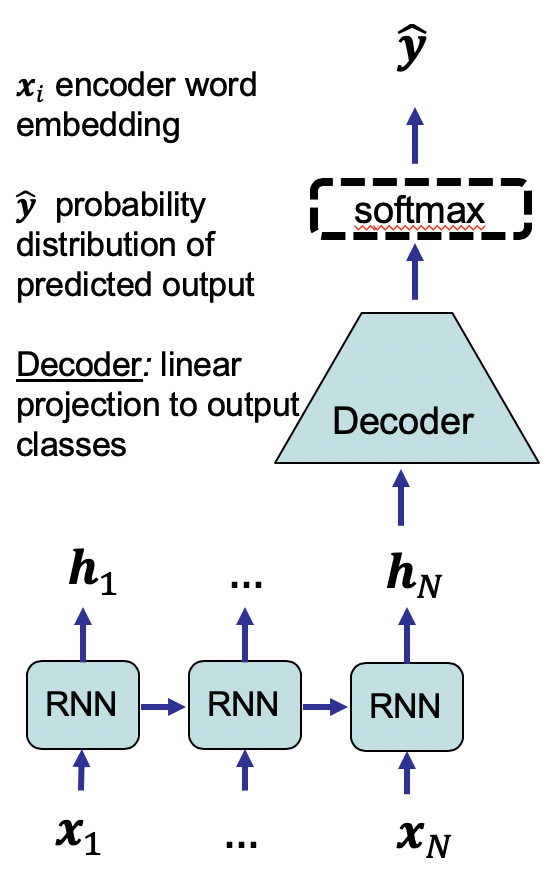

The implementation of `ClassificationRNNModel` covers the following points:

**Baseline model (5 points):** The baseline LSTM model first fetches the corresponding embeddings of the word IDs of a given batch. It then calculates hidden states of the given sequences (documents) with the LSTM model. Finally, the **last hidden state** of LSTM is used as document embedding to predict the probability distribution of the output classes by the decoder (a linear projection) and a softmax layer. A dropout layer is applied to the output of the LSTM.

**Model variations (3 points):** Implement the **three variations** of the baseline LSTM model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationRNNModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Variation 1 - Word Embeddings & RNN (1 point).** Select (at least) one of these proposed cases:
  - Freeze the weights of encoder word embeddings (no updates)
  - Initialize the encoder word embeddings randomly instead of using pretrained embeddings. 
  - Increase/decrease the dimension of the hidden state of the RNN.
  - Use GRU instead of LSTM.

- **Variation 2 - Regularization & Optimization (1 point).** Select (at least) one of these proposed cases:
  - Increase/decrease drop out rates and tune the model accordingly.
  - Add L2 weight regularization to the loss function.
  - Use SGD instead of Adam.

- **Variation 3 - Document Embedding (1 point).** Select (at least) one of these proposed cases:
  - Use a Bidirectional LSTM, and set the document embedding as the concatenation of the last state of forward LSTM with the last state of backward LSTM.
  - Calculate the mean of all the intermediary hidden states as the final document embedding.

**Reporting and discussion (2 points)** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.

</div>

In [93]:
class ClassificationRNNModel(ClassificationAverageModel):
    """
    Classification model with LSTM
    """
    def __init__(
            self,
            lookup,
            num_classes: int,
            freeze_embeddings=False, # variation 1.1
            random_embeddings=False, # variation 1.2
            hidden_size=128, # variation 1.3
            bidirectional=False, # variation 3.1
            dropout=0.5, # variation 2.1
            calculate_mean=False, # variation 3.2
            rnn_type="LSTM", # variation 1.4
            ):
        """
        Initialize the model
        :param freeze_embeddings: Whether to freeze the embeddings or not
        :param random_embeddings: Whether to initialize the embeddings randomly or not
        :param hidden_size: Hidden size of the LSTM
        :param bidirectional: Whether to use a bidirectional LSTM or not
        :param dropout: Dropout rate
        :param calculate_mean: Whether to calculate the mean of the hidden states or not
        """
        super().__init__(lookup, num_classes)
        self.freeze_embeddings = freeze_embeddings
        self.random_embeddings = random_embeddings
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.optimizer = optimizer
        self.calculate_mean = calculate_mean
        self.embedding_dim = lookup.embedding_dim
        self.rnn_type = rnn_type

        self.rnn = None
        self.decoder = None
        self._build_model()

    def _build_model(self):
        """
        Build the model
        :return: None
        """
        # Embeddings
        if self.random_embeddings:
            self.lookup = nn.Embedding.from_pretrained(
                torch.randn(self.vocab_size, self.embedding_dim)
            )
        if self.freeze_embeddings:
            self.lookup.weight.requires_grad = False
        # RNN
        if self.rnn_type == "LSTM":
            self.rnn = nn.LSTM(
                input_size=self.embedding_dim,
                hidden_size=self.hidden_size,
                num_layers=1,
                batch_first=True,
                bidirectional=self.bidirectional,  # TODO: does it actually use the last hidden states?
                dropout=self.dropout,  # TODO: double-check
            )
        elif self.rnn_type == "GRU":
            self.rnn = nn.GRU(
                input_size=self.embedding_dim,
                hidden_size=self.hidden_size,
                num_layers=1,
                batch_first=True,
                bidirectional=self.bidirectional,
                dropout=self.dropout,
            )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Dropout(self.dropout),
            nn.Linear(self.hidden_size, self.num_classes),
        )

    def forward(self, x):
        """
        Forward pass
        :param x: input batch
        :return: output logits
        """
        # Embeddings
        x = self.lookup(x)
        # RNN
        x, _ = self.rnn(x)
        # Document embedding
        if self.bidirectional:
            x = torch.cat((x[:, -1, :self.hidden_size], x[:, 0, self.hidden_size:]), dim=1)
        elif self.calculate_mean:
            x = torch.mean(x, dim=1)
        else:
            x = x[:, -1, :]
        # Decoder
        x = self.decoder(x)
        return x

In [180]:
model = ClassificationRNNModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0]
).to(device)
# TODO: check out this error message

C:\Users\marku\anaconda3\envs\nlp-course\lib\site-packages\torch\nn\modules\rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [181]:
from torch import optim

config['LOSS'] = "ce"
if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

In [182]:
config['LR'] = 1e-3
config['optim_fn'] = "adam"
config["l2_regularization"] = 0.0  # TODO: check if 100% same as weight decay

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
    # TODO: with sgd
    # TODO: run with different learning rates
    # TODO: run with different L2 regularizations
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

In [184]:
config['N_EPOCHS'] = 3
config['PATIENCE'] = 3
config['DO_TRAIN'] = True

# TODO
# wandb.config = {}
# wandb.config['pytorch_model'] = config

# wandb.watch(model)

In [185]:
if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        device=device
    )
else:
    best_model = torch.load("best_model.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.001
Epochs: 3, Patience: 3



Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.45928984310487203, Train loss: 1.7227945871906734
Validation Accuracy: 0.5882126348228043
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.6822460776218001, Train loss: 1.0492105384929828
Validation Accuracy: 0.7311248073959938
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.8189925681255161, Train loss: 0.6398939506831458
Validation Accuracy: 0.7615562403697997
Best model updated
Training finished
Best validation accuracy:  0.7615562403697997
Best epoch:  3


In [101]:
y_pred_test = predict(best_model, batches["test"]["x"], device=device)

In [102]:
assert y_pred_test.shape == (test_df.shape[0],)

In [103]:
acc_test = accuracy_score(test_df["label"], y_pred_test)
acc_test

0.7603082851637765

# Reporting
**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

Sufficient information and examples are provided throughout the notebook.

In [104]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)

In [105]:
acc_val = accuracy_score(val_df["label"], y_pred_val)
acc_val

0.7519260400616333

In [106]:
print(f"Validation accuracy: {acc_val}")
print(f"Test accuracy: {acc_test}")

Validation accuracy: 0.7519260400616333
Test accuracy: 0.7603082851637765


In [107]:
report = pd.DataFrame(
    {
        "Validation Accuracy": [acc_val],
        "Test Accuracy": [acc_test],
    }
)
report

,Validation Accuracy,Test Accuracy
0,0.751926,0.760308


<a name="section-classification-attention"></a><h2 style="color:rgb(0,120,170)">Task C: Document Classification with Attention (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Attention networks. The model is called **`ClassificationAttentionModel`** in the code, containing all various variants as explained later. The basic architecture of `ClassificationAttentionModel` is shown in the figure below.

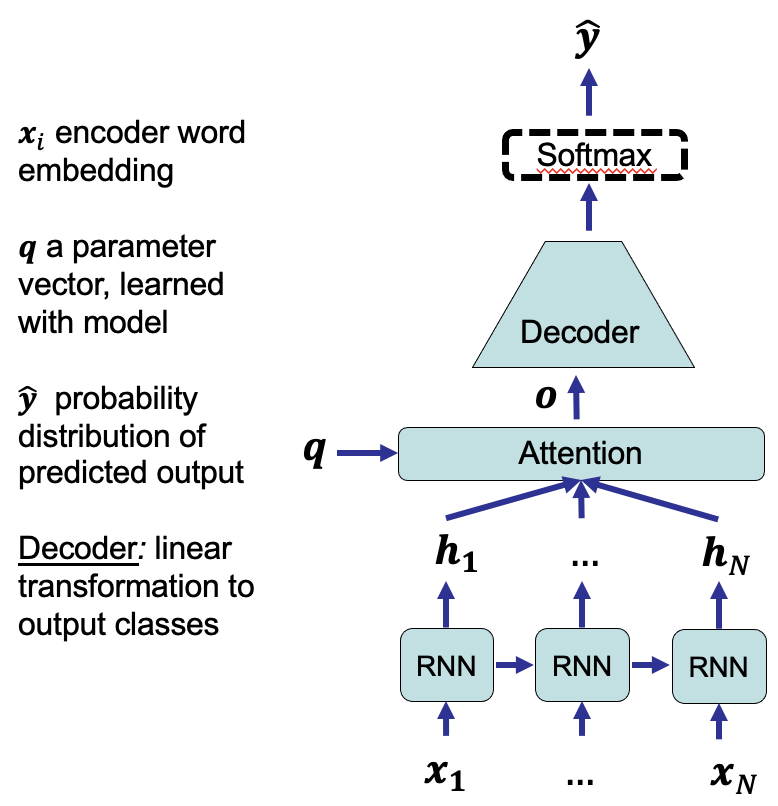

The implementation of the basic architecture of `ClassificationAttentionModel` should cover the following points:

**Baseline model**  

- **Embeddings & RNN Layer (1 points).** The baseline model first fetches the corresponding embeddings of the word IDs of a given batch. Next, a bidirectional LSTM/GRU layer is applied to the word embeddings. The hidden states of this RNN model can be seen as the contextual embeddings of the underlying word embeddings, and will be used in the next layer instead of the original word embeddings.

- **Attention Layer (4 points).** This Attention layer should be implemented by you from scratch without using any specific library/class. Here, you implement the baseline Attention layer following the formulation of the (single-head) **basic dot-product Attention**. In this model, Query vector is defined in the model's initialization as *a vector of learnable parameters*, whose values are learned together with the other model's parameters during training. The hidden states of the previous layer are passed as the values (and keys) to the Attention layer, where the Query vector is the query of the Attention. An important point in the forward pass of the Attention layer is correctly setting the padding masks, which mask out the attention weights of the padded tokens of each batch. The masks excludes the corresponding vectors of these padded tokens from the calculations in Attention. If the mask is not passed correctly, the padded items will be counted in the Softmax of the Attention layer, and influence other attention weights. A sign that the baseline model is working correctly is that the final attention weights of the corresponding vectors of the padded tokens are equal to zero. 

- **Prediction Layer (1 points).** The output of the Attention layer for each batch is the corresponding document embedding, passed to the decoder layer (a linear projection) and softmax to predict the probability distribution of the output classes.

- **General model functionality (1 points).** 


**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationAttentionModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **No RNN (1 point).** Run the model without the RNN layer.

- **Another attention variation (1 point).** Implement another type of single-head Attention other than basic dot-product.

**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.


</div>

In [201]:
class DotProductAttention(nn.Module):
    def __init__(self, hidden_size):
        """
        Calculate the attention weights using the dot-product of the query and keys.
        :param hidden_size: the size of the hidden state
        """
        super(DotProductAttention, self).__init__()
        self.query = nn.Parameter(torch.randn(hidden_size))

    def forward(self, values, keys, mask=None):
        """
        :param values: (batch_size, seq_len, hidden_size)
        :param keys: (batch_size, seq_len, hidden_size)
        :param mask: (batch_size, seq_len)
        :return: attention: (batch_size, hidden_size)
                 attention_weights: (batch_size, seq_len)
        """
        # Calculate the attention weights
        attention_weights = torch.matmul(keys, self.query)
        attention_weights = attention_weights / math.sqrt(self.query.size(0))
        # Mask the attention weights
        if mask is not None:
            attention_weights = attention_weights.masked_fill(mask == 0, -1e9)
            # TODO: double-check masking
        # Softmax
        attention_weights = F.softmax(attention_weights, dim=1)
        # Calculate the attention
        attention = torch.matmul(attention_weights.unsqueeze(1), values).squeeze(1)
        return attention, attention_weights

class ConcatAttention(nn.Module):
    # TODO: Implement the ConcatAttention class
    pass

class ClassificationAttentionModel(ClassificationAverageModel):
    def __init__(
            self,
            lookup,
            num_classes,
            freeze_embeddings=False,
            random_embeddings=False,
            hidden_size=128,
            bidirectional=True,
            dropout=0.5,
            attention_type="dot",
            rnn_type="LSTM",
            no_rnn=False,
    ):
        """
        Initialize the model
        :param freeze_embeddings: Whether to freeze the embeddings or not
        :param random_embeddings: Whether to initialize the embeddings randomly or not
        :param hidden_size: Hidden size of the LSTM
        :param bidirectional: Whether to use a bidirectional LSTM or not
        :param dropout: Dropout rate
        :param attention_type: Type of attention to use
        :param rnn_type: Type of RNN to use
        """
        super().__init__(lookup, num_classes)
        self.freeze_embeddings = freeze_embeddings
        self.random_embeddings = random_embeddings
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.embedding_dim = lookup.embedding_dim
        self.attention_type = attention_type
        self.rnn_type = rnn_type
        self.no_rnn = no_rnn  # TODO: test this

        self.rnn = None
        self.attention = None
        self.decoder = None
        self._build_model()

    def _build_model(self):
        """
        Build the model
        :return: None
        """
        # Embeddings
        if self.random_embeddings:
            self.lookup = nn.Embedding.from_pretrained(
                torch.randn(self.vocab_size, self.embedding_dim)
            )
        if self.freeze_embeddings:
            self.lookup.weight.requires_grad = False
        # RNN
        if self.no_rnn:
            self.rnn = None
        else:
            if self.rnn_type == "LSTM":
                self.rnn = nn.LSTM(
                    input_size=self.embedding_dim,
                    hidden_size=self.hidden_size,
                    num_layers=1,
                    batch_first=True,
                    bidirectional=self.bidirectional,
                    dropout=self.dropout,
                )
            elif self.rnn_type == "GRU":
                self.rnn = nn.GRU(
                    input_size=self.embedding_dim,
                    hidden_size=self.hidden_size,
                    num_layers=1,
                    batch_first=True,
                    bidirectional=self.bidirectional,
                    dropout=self.dropout,
                )
        # Attention
        if self.no_rnn:
            self.attention = DotProductAttention(self.embedding_dim)
        else:
            self.attention = DotProductAttention(self.hidden_size * 2 if self.bidirectional else self.hidden_size)

        # Decoder
        if self.no_rnn:
            self.decoder = nn.Linear(self.embedding_dim, self.num_classes)
        else:
            self.decoder = nn.Linear(self.hidden_size * 2 if self.bidirectional else self.hidden_size, self.num_classes)

        # Dropout
        self.dropout = nn.Dropout(self.dropout)

        # Query vector
        self.query = nn.Parameter(torch.randn(self.hidden_size * 2 if self.bidirectional else self.hidden_size))

    def forward(self, x):
        """
        Forward pass
        :param x: Input
        :return: Output
        """
        # Embeddings
        x = self.lookup(x)
        # RNN
        if self.no_rnn:
            x = x
        elif self.rnn_type == "lstm":
            x, _ = self.rnn(x)
        elif self.rnn_type == "gru":
            x, _ = self.rnn(x)
        # Attention
        x, _ = self.attention(x, x)
        # Decoder
        x = self.decoder(x)
        return x

In [202]:
model = ClassificationAttentionModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0],
    no_rnn=True,
    attention_type="dot",
).to(device)

In [203]:
from torch import optim

config['LOSS'] = "ce"
if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

In [204]:
config['LR'] = 1e-3
config['optim_fn'] = "adam"

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'])
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

In [205]:
config['N_EPOCHS'] = 3
config['PATIENCE'] = 3
config['DO_TRAIN'] = True

# wandb.config = {}
# wandb.config['pytorch_model'] = config

# wandb.watch(model)

In [206]:
import math

if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        device=device
    )
else:
    best_model = torch.load("best_model.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.001
Epochs: 3, Patience: 3



Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.7, Train loss: 1.0581229460821302
Validation Accuracy: 0.7950693374422187
Best model updated
Epoch: 2


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.85177539223782, Train loss: 0.5191447728148866
Validation Accuracy: 0.8147149460708782
Best model updated
Epoch: 3


Training:   0%|          | 0/379 [00:00<?, ?it/s]

Train accuracy: 0.890503715937242, Train loss: 0.39202905762793205
Validation Accuracy: 0.8135593220338984
Training finished
Best validation accuracy:  0.8147149460708782
Best epoch:  2


In [207]:
y_pred_test = predict(best_model, batches["test"]["x"], device=device)

In [208]:
assert y_pred_test.shape == (test_df.shape[0],)

In [209]:
acc_test = accuracy_score(test_df["label"], y_pred_test)
acc_test

0.8142581888246628

# Reporting
**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

Sufficient information and examples are provided throughout the notebook.

In [210]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)

In [211]:
acc_val = accuracy_score(val_df["label"], y_pred_val)
acc_val

0.8135593220338984

In [212]:
print(f"Validation accuracy: {acc_val}")
print(f"Test accuracy: {acc_test}")

Validation accuracy: 0.8135593220338984
Test accuracy: 0.8142581888246628


In [213]:
report = pd.DataFrame(
    {
        "Validation Accuracy": [acc_val],
        "Test Accuracy": [acc_test],
    }
)
report

,Validation Accuracy,Test Accuracy
0,0.813559,0.814258


<a name="section-classification-transformer"></a><h2 style="color:rgb(0,120,170)">Task D: Document Classification with Transformer (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
This task implements a document classification model using Transformer Decoder. This model is called **`ClassificationTransformerModel`** in the code, containing all various variants as explained later. 

The implementation of the basic architecture of `ClassificationTransformerModel` covers the following points:

**Baseline model:** The architecture of baseline `ClassificationTransformerModel`is the exactly the same as the one of `ClassificationAttentionModel`. The only difference is that `ClassificationTransformerModel` replaces the Attention layer with a Transformer Decoder. 

- **Transformer Decoder (3 points).** Use `torch.nn.TransformerDecoder` class or any other implementation of Transformer Decoder. The baseline model consists of one layer of Transformer Decoder and is defined with default parameters of Transformer Decoder. As before, Query vector is defined separately, and used as the query of the Transformer.

- **Model Functionality (1 point).**

**Model variations:** Implement the **two variations** of the baseline model as explained below. Each variation applies only one change to the baseline architecture, making it possible to study the effect of the change. The code of all variations should be inside `ClassificationTransformerModel`, and executing a variation should be done by simply passing the corresponding parameters of the variation to the model. 

- **Transformer Encoder (3 point).** Replace the RNN layer with a Transformer Encoder. Similar to the RNN, the aim of this layer is to provide contextual embeddings of the input word embeddings. 

- **Number of heads (1 point).** Study the effect of increasing/decreasing the number of heads of the Transformer Decoder.

- **Number of layers (1 point).** Study the effect of increasing the layers of the Transformer Decoder.


**Reporting and discussion (1 point).** Report the evaluation results of the baseline model, as well as the ones for all the variations in a table and also in a plot. Discuss which variation(s) appear to be the most effective. Explain your take.
</div>

In [62]:
class ClassificationTransformerModel(ClassificationAverageModel):
    def __init__(
            self,
            lookup,
            num_classes,
            freeze_embeddings=False,
            random_embeddings=False,
            hidden_size=128,
            bidirectional=True,
            dropout=0.5,
            attention_type="dot",
            rnn_type="LSTM",
            use_transformer_encoder=False,
            n_heads=1,
            n_layers=1,
    ):
        super().__init__(lookup, num_classes)
        self.freeze_embeddings = freeze_embeddings
        self.random_embeddings = random_embeddings
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional
        self.dropout = dropout
        self.embedding_dim = lookup.embedding_dim
        self.attention_type = attention_type
        self.rnn_type = rnn_type
        self.use_transformer_encoder = use_transformer_encoder
        self.n_heads = n_heads
        self.n_layers = n_layers

        self.rnn = None
        self.attention = None
        self.decoder = None
        self._build_model()

    def _build_model(self):
        """
        Build the model
        :return: None
        """
        # Embeddings
        if self.random_embeddings:
            self.lookup = nn.Embedding.from_pretrained(
                torch.randn(self.vocab_size, self.embedding_dim)
            )
        if self.freeze_embeddings:
            self.lookup.weight.requires_grad = False
        # encoder
        if self.use_transformer_encoder:
            self.encoder = nn.TransformerEncoder(
                nn.TransformerEncoderLayer(
                    d_model=self.embedding_dim,
                    nhead=self.n_heads,
                    dim_feedforward=self.hidden_size,
                    dropout=self.dropout,
                ),
                num_layers=self.n_layers,
            )
        else:
            self.encoder = getattr(nn, self.rnn_type)(
                input_size=self.embedding_dim,
                hidden_size=self.hidden_size,
                bidirectional=self.bidirectional,
                batch_first=True,
                dropout=self.dropout,
            )
        # transformer decoder
        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(
                d_model=self.embedding_dim,
                nhead=self.n_heads,
                dim_feedforward=self.hidden_size,
                dropout=self.dropout,
            ),
            num_layers=self.n_layers,
        )

        # linear
        self.linear = nn.Linear(
            in_features=self.embedding_dim,
            out_features=self.num_classes,
        )

        # dropout
        self.dropout = nn.Dropout(self.dropout)

        # softmax
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        """
        Forward pass
        :param x: input
        :return: output
        """
        # embeddings
        x = self.lookup(x)
        # encoder
        if self.use_transformer_encoder:
            x = self.encoder(x)
        else:
            x, _ = self.encoder(x)
        # decoder
        x = self.decoder(x, x)
        # linear
        x = self.linear(x)
        # dropout
        x = self.dropout(x)
        # softmax
        x = self.softmax(x)
        return x




In [63]:
model = ClassificationTransformerModel(
    lookup=lookup.to(device),
    num_classes=np.unique(train_df["label"]).shape[0]
).to(device)
# TODO: check out this error message

C:\Users\marku\anaconda3\envs\nlp-course\lib\site-packages\torch\nn\modules\rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [64]:
from torch import optim

config['LOSS'] = "ce"
if config['LOSS'] == "nll":
    criterion = nn.NLLLoss()
else:
    # Cross Entropy is the default loss function
    criterion = nn.CrossEntropyLoss()

In [65]:
config['LR'] = 1e-3
config['optim_fn'] = "adam"
config["l2_regularization"] = 0.0  # TODO: check if 100% same as weight decay

if config['optim_fn'] == "sgd":
    optimizer = optim.SGD(model.parameters(), lr=config['LR'], weight_decay=config["l2_regularization"])
    # TODO: with sgd
    # TODO: run with different learning rates
    # TODO: run with different L2 regularizations
else:
    # Adam is the default optimizer
    optimizer = optim.Adam(model.parameters(), lr=config['LR'])

In [66]:
config['N_EPOCHS'] = 3
config['PATIENCE'] = 3
config['DO_TRAIN'] = True

# TODO
# wandb.config = {}
# wandb.config['pytorch_model'] = config

# wandb.watch(model)

In [67]:
if config['DO_TRAIN']:
    best_model = do_train(
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        batches=batches,
        epochs=config['N_EPOCHS'],
        patience=config['PATIENCE'],
        device=device
    )
else:
    best_model = torch.load("best_model.pt").to(device)

Start training!
Optimizer: adam, Loss: ce, LR: 0.001
Epochs: 3, Patience: 3



Epochs:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1


Training:   0%|          | 0/379 [00:00<?, ?it/s]

AssertionError: was expecting embedding dimension of 300, but got 256

In [101]:
y_pred_test = predict(best_model, batches["test"]["x"], device=device)

In [102]:
assert y_pred_test.shape == (test_df.shape[0],)

In [103]:
acc_test = accuracy_score(test_df["label"], y_pred_test)
acc_test

0.7603082851637765

# Reporting
**Reporting (0.5 point)** During loading and processing the collection, provide sufficient information and examples about the data and the applied processing steps. Report the results of the best performing model on the validation and test set in a table. Additionally, feel free to add any plot showing the results.

Sufficient information and examples are provided throughout the notebook.

In [104]:
y_pred_val = predict(best_model, batches["val"]["x"], device=device)

In [105]:
acc_val = accuracy_score(val_df["label"], y_pred_val)
acc_val

0.7519260400616333

In [106]:
print(f"Validation accuracy: {acc_val}")
print(f"Test accuracy: {acc_test}")

Validation accuracy: 0.7519260400616333
Test accuracy: 0.7603082851637765


In [107]:
report = pd.DataFrame(
    {
        "Validation Accuracy": [acc_val],
        "Test Accuracy": [acc_test],
    }
)
report

,Validation Accuracy,Test Accuracy
0,0.751926,0.760308


<a name="section-interpretation"></a><h2 style="color:rgb(0,120,170)">Task E: Interpreting Attention Weights (3 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">

The aim of this task is to provide an interpretation of the functionality of one of the models, by exploring which words have the higher contributions to the prediction results of some specific documents. 

**Attention weights (2.5 extra points):** Select one of the models trained in the previous tasks as you prefer. Select four documents from test set, such that two are correctly and the other two are incorrectly classified by the model. Next, run the forward pass for each of these documents and extract the corresponding attention weights from the model. Separately for each document, interpret the mechanism of the classifier by looking at the words with the highest attention weights. Do these words – in your opinion – provide important information to the predicted class?

**Visualization (0.5 overall extra points):** Visualize the attention weights over document’s words. Some suggested tools and resources:

https://github.com/minqi/hnatt

https://github.com/jiesutd/Text-Attention-Heatmap-Visualization 

https://github.com/cbaziotis/neat-vision
</div>